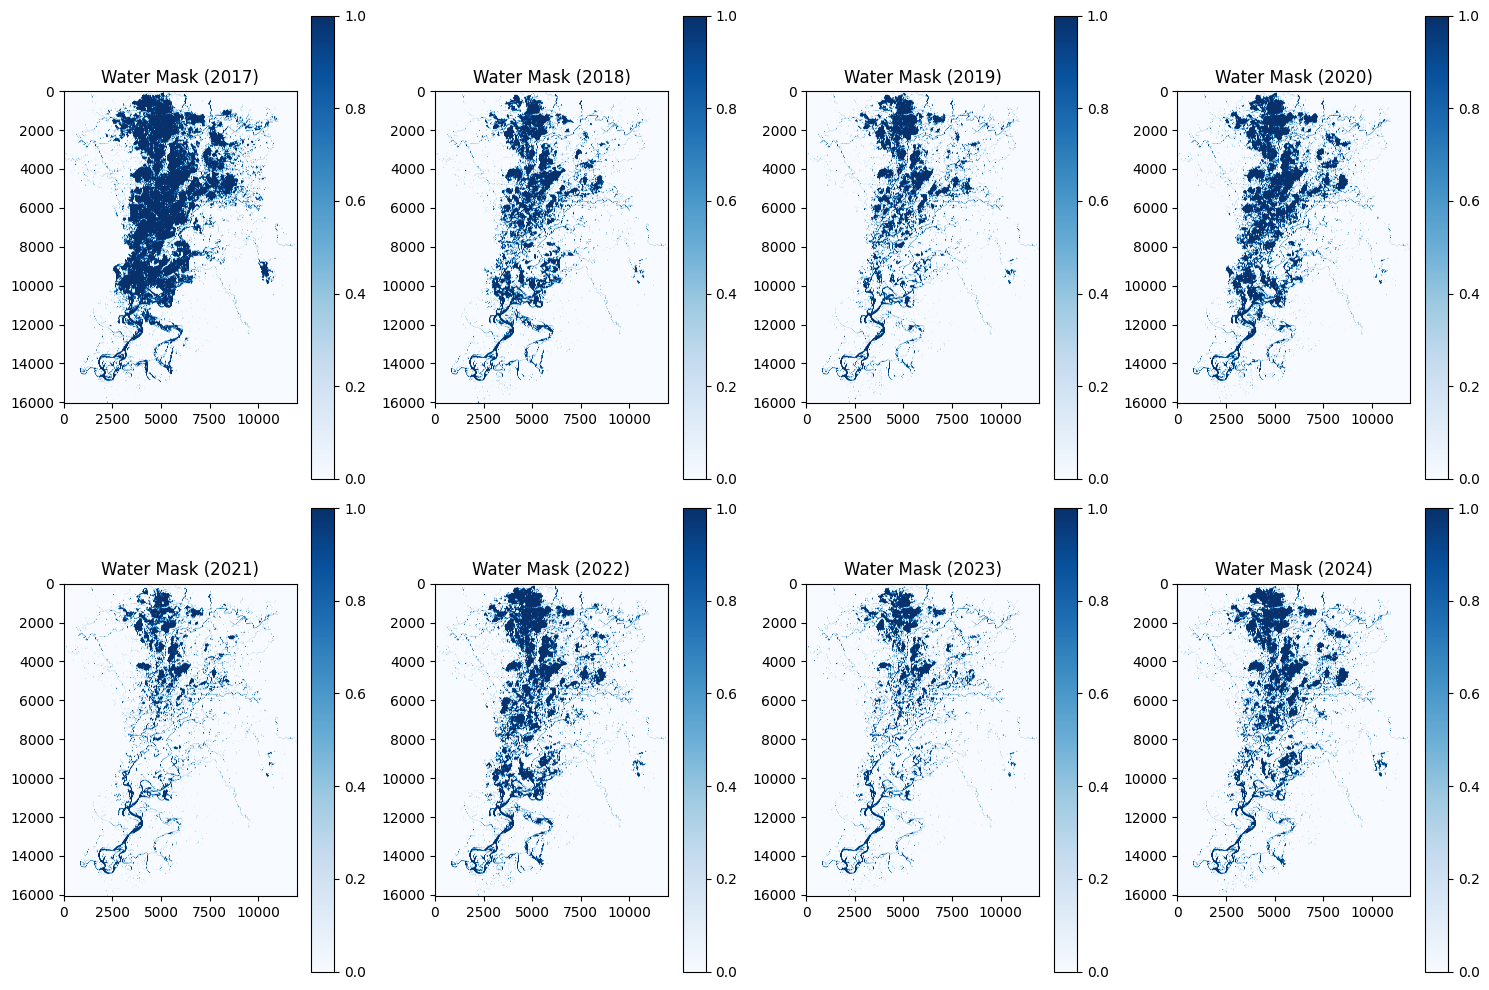

In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

lulc_files = [
    'gis/LULC2017c.tif',
    'gis/LULC2018c.tif',    
    'gis/LULC2019c.tif',
    'gis/LULC2020c.tif',        
    'gis/LULC2021c.tif',    
    'gis/LULC2022c.tif',
    'gis/LULC2023c.tif',
    'gis/LULC2024c.tif',
]

WATER_CLASS = 1
VEGETATION_CLASS = 2
FLOODED_CLASS = 9
FLOOD_CLASS = 4
URBAN_CLASS = 7

plt.figure(figsize=(15, 10))

for i, lulc_file in enumerate(lulc_files):
    with rasterio.open(lulc_file) as src:
        lulc_data = src.read(1)  
        
    water_mask = (lulc_data == WATER_CLASS)
    flooded_mask = (lulc_data == FLOODED_CLASS)
    flood_mask = (lulc_data == FLOOD_CLASS)
    
    # Plot each LULC raster (2017-2024)
    plt.subplot(2, 4, i+1)  # 2 rows, 4 columns, each subplot
    plt.imshow(water_mask, cmap='Cyan')
    plt.title(f'Water Mask ({2017 + i})')
    plt.colorbar()

plt.tight_layout()
plt.savefig("Figure/Hydro_Water.png", dpi=500)
plt.show()

In [18]:
# Create a dictionary to store the areas for each class across years
area_dict = {'Year': [], 'Water Area (m²)': [],'Flood Area (m²)': [], 'Flooded Area (m²)': [], 'Vegetation Area (m²)': [],'Urban Area (m²)': []}

# Loop through each year
for i, lulc_file in enumerate(lulc_files):
    with rasterio.open(lulc_file) as src:
        lulc_data = src.read(1)  # Read the first band (LULC class)
        transform = src.transform  # Get the transformation matrix
    
    # Calculate the masks for each hydrological class
    water_mask = (lulc_data == WATER_CLASS)
    flooded_mask = (lulc_data == FLOODED_CLASS)
    flood_mask = (lulc_data == FLOOD_CLASS)
    veg_mask = (lulc_data == VEGETATION_CLASS)
    urban_mask = (lulc_data == URBAN_CLASS)
    
    
    # Calculate the area of each hydrological class (in terms of pixels)
    water_area_pixels = np.sum(water_mask)
    flooded_area_pixels = np.sum(flooded_mask)
    flood_area_pixels = np.sum(flood_mask)
    veg_area_pixels = np.sum(veg_mask)
    urban_area_pixels = np.sum(urban_mask)
    
    # Convert pixel count to actual area (in square meters)
    pixel_size = transform[0]  # Size of one pixel in meters (from the transform matrix)
    water_area_m2 = water_area_pixels * pixel_size**2
    flooded_area_m2 = flooded_area_pixels * pixel_size**2
    flood_area_m2 = flood_area_pixels * pixel_size**2
    veg_area_m2 = veg_area_pixels * pixel_size**2
    urban_area_m2 = urban_area_pixels * pixel_size**2
    
    # Store the results
    area_dict['Year'].append(2017 + i)
    area_dict['Water Area (m²)'].append(water_area_m2)
    area_dict['Flooded Area (m²)'].append(flooded_area_m2)
    area_dict['Flood Area (m²)'].append(flood_area_m2)
    area_dict['Vegetation Area (m²)'].append(veg_area_m2)
    area_dict['Urban Area (m²)'].append(urban_area_m2)

# Display the results in a DataFrame
import pandas as pd
area_df = pd.DataFrame(area_dict)

# Replace the problematic line with:
print("LULC Hydrological Area Analysis")
print("=" * 40)
display(area_df)  # This works in Jupyter notebooks
# OR if you're not in Jupyter:
print(area_df.to_string(index=False))
print("=" * 40)

LULC Hydrological Area Analysis


,Year,Water Area (m²),Flood Area (m²),Flooded Area (m²),Vegetation Area (m²),Urban Area (m²)
0,2017,4.141525e+09,604154200.0,0.0,1.120824e+09,8.822642e+08
1,2018,2.427318e+09,237302100.0,0.0,9.827860e+08,1.114500e+09
2,2019,2.083190e+09,257137400.0,0.0,9.597035e+08,1.260649e+09
3,2020,2.841814e+09,179889000.0,0.0,9.010560e+08,1.341468e+09
4,2021,1.534033e+09,225442200.0,0.0,8.630248e+08,1.532445e+09
5,2022,2.640883e+09,136103000.0,0.0,8.302019e+08,1.576606e+09
6,2023,1.602213e+09,126962400.0,0.0,7.693081e+08,1.574196e+09
7,2024,2.340093e+09,150522800.0,0.0,8.769282e+08,1.557180e+09


 Year  Water Area (m²)  Flood Area (m²)  Flooded Area (m²)  Vegetation Area (m²)  Urban Area (m²)
 2017     4141525400.0      604154200.0                0.0          1120824100.0      882264200.0
 2018     2427318200.0      237302100.0                0.0           982786000.0     1114500500.0
 2019     2083190100.0      257137400.0                0.0           959703500.0     1260649300.0
 2020     2841813500.0      179889000.0                0.0           901056000.0     1341468100.0
 2021     1534033400.0      225442200.0                0.0           863024800.0     1532445400.0
 2022     2640883300.0      136103000.0                0.0           830201900.0     1576605800.0
 2023     1602212900.0      126962400.0                0.0           769308100.0     1574195500.0
 2024     2340093100.0      150522800.0                0.0           876928200.0     1557180300.0


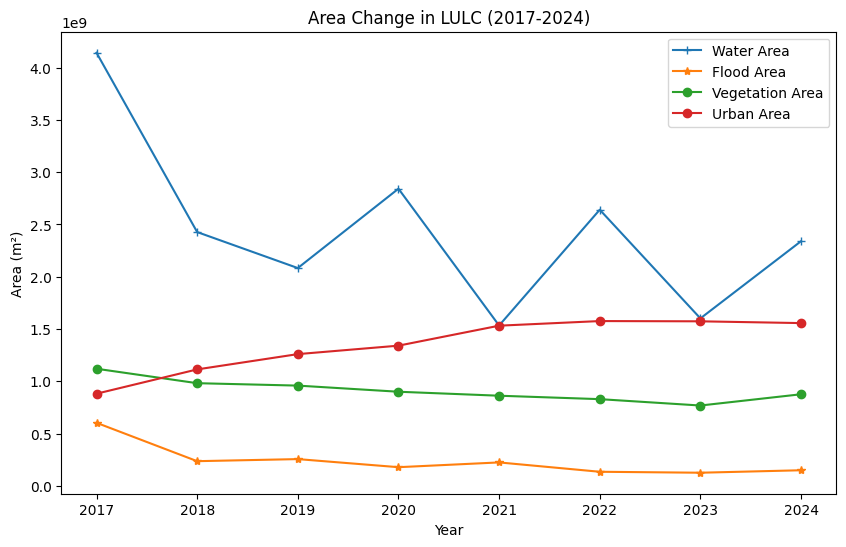

In [58]:
# Plot the temporal changes in each hydrological class
plt.figure(figsize=(10, 6))

# Plot area change over time for each class
plt.plot(area_df['Year'], area_df['Water Area (m²)'], label='Water Area', marker='+')
plt.plot(area_df['Year'], area_df['Flood Area (m²)'], label='Flood Area', marker='*')
plt.plot(area_df['Year'], area_df['Vegetation Area (m²)'], label='Vegetation Area', marker='o')
plt.plot(area_df['Year'], area_df['Urban Area (m²)'], label='Urban Area', marker='o')


plt.xlabel('Year')
plt.ylabel('Area (m²)')
plt.title('Area Change in LULC (2017-2024)')
plt.legend()
plt.grid(False)
plt.show()

In [61]:
area_df.to_csv("geodata/LULCAreaCover.csv")

In [31]:
import rasterio
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the class codes for Hydrological and Vegetation areas (example codes, replace with your actual codes)
WATER_CLASS = 1
VEGETATION_CLASS = 2
FLOODED_CLASS = 9
FLOOD_CLASS = 4
URBAN_CLASS = 7

# Load SOC data (1985 and 2025)
data_1985 = pd.read_csv('data/PresentTopSoil.csv')
data_2025 = pd.read_csv('data/PreviousTopSoil.csv')

# Merge the SOC data on 'Location'
merged_data = pd.merge(data_1985, data_2025, on='Location', suffixes=('_1985', '_2025'))

# Load the LULC raster for a specific year (e.g., 2017)
lulc_file = 'gis/LULC2017c.tif'
with rasterio.open(lulc_file) as src:
    lulc_data = src.read(1)  # Read the first band (LULC class)
    transform = src.transform  # Get the transformation matrix
    raster_crs = src.crs  # CRS of the raster
    
# Assuming you have 9 locations with Latitude and Longitude
locations = gpd.GeoDataFrame(merged_data, 
                             geometry=gpd.points_from_xy(merged_data['Longitude_1985'], merged_data['Latitude_1985']), 
                             crs="EPSG:4326")

locations = locations.to_crs(raster_crs)

# Create dictionaries to store area for hydrological and vegetation classes
location_area_dict = {'Location': [], 'Water Area (m²)': [], 'Flooded Area (m²)': [], 'Flood Area (m²)': [],
                      'Urban Area (m²)': [], 'Vegetation Area (m²)': []}

# Loop over each location and extract hydrological and vegetation areas
for index, row in locations.iterrows():
    lon, lat = row['geometry'].x, row['geometry'].y
    
    # Get the pixel location in row/col format using the rasterio transform
    row_idx, col_idx = src.index(lon, lat)
    
    # Read the LULC class at that pixel
    lulc_class = lulc_data[row_idx, col_idx]
    
    # Calculate the area for each class (water, flooded, flood, urban, and vegetation)
    water_area = np.sum(lulc_data == WATER_CLASS)
    flooded_area = np.sum(lulc_data == FLOODED_CLASS)
    flood_area = np.sum(lulc_data == FLOOD_CLASS)
    urban_area = np.sum(lulc_data == URBAN_CLASS)
    vegetation_area = np.sum(lulc_data == VEGETATION_CLASS)
    
    # Store the results for each location
    location_area_dict['Location'].append(row['Location'])
    location_area_dict['Water Area (m²)'].append(water_area * transform[0]**2)
    location_area_dict['Flooded Area (m²)'].append(flooded_area * transform[0]**2)
    location_area_dict['Flood Area (m²)'].append(flood_area * transform[0]**2)
    location_area_dict['Urban Area (m²)'].append(urban_area * transform[0]**2)
    location_area_dict['Vegetation Area (m²)'].append(vegetation_area * transform[0]**2)

# Convert the dictionary to a DataFrame
location_area_df = pd.DataFrame(location_area_dict)

# Merge the area data with the SOC data (from merged_data DataFrame)
final_df = pd.merge(location_area_df, merged_data[['Location', 'SOC%_1985', 'SOC%_2025', 'Stock_1985', 'Stock_2025',
                                                   'pH_1985', 'pH_2025', 'TN_1985', 'TN_2025', 'SBD_1985', 'SBD_2025',
                                                   'CEC_1985', 'CEC_2025', 'Clay_1985', 'Clay_2025',
                                                  ]], on='Location')
final_df

,Location,Water Area (m²),Flooded Area (m²),Flood Area (m²),Urban Area (m²),Vegetation Area (m²),SOC%_1985,SOC%_2025,Stock_1985,Stock_2025,pH_1985,pH_2025,TN_1985,TN_2025,SBD_1985,SBD_2025,CEC_1985,CEC_2025,Clay_1985,Clay_2025
0,Ajmiriganj,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,2.630,2.630,351.12,351.12,4.10,4.10,0.15,0.15,1.56,1.56,198.75,198.75,55.44,55.44
1,Balaganj,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,0.960,0.960,148.71,148.71,5.39,5.39,0.12,0.12,2.05,2.05,206.90,206.90,49.63,49.63
2,Goainghat,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,1.100,1.100,149.65,149.65,5.86,5.86,0.11,0.11,1.37,1.37,271.50,271.50,67.56,67.56
3,Hakaluki,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,1.325,1.325,109.14,109.14,4.34,4.34,0.11,0.11,1.66,1.66,167.48,167.48,33.56,33.56
4,Kanairghat,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,1.220,1.220,151.46,151.46,4.02,4.02,0.13,0.13,1.69,1.69,180.39,180.39,35.96,35.96
5,Phagu,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,0.635,0.635,98.34,98.34,5.25,5.25,0.10,0.10,1.61,1.61,203.98,203.98,48.88,48.88
6,Sarail,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,1.035,1.035,96.25,96.25,4.19,4.19,0.12,0.12,1.86,1.86,184.29,184.29,37.27,37.27
7,Sulla,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,1.425,1.425,225.03,225.03,4.31,4.31,0.13,0.13,1.84,1.84,167.49,167.49,31.69,31.69
8,Terchibari,4.141525e+09,0.0,604154200.0,882264200.0,1.120824e+09,1.140,1.140,128.83,128.83,5.24,5.24,0.13,0.13,1.25,1.25,325.00,325.00,72.20,72.20


In [40]:
import rasterio
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from rasterio.features import geometry_mask
import matplotlib.pyplot as plt

# Define the class codes for Hydrological and Vegetation areas (example codes, replace with your actual codes)
WATER_CLASS = 1
VEGETATION_CLASS = 2
FLOODED_CLASS = 9
FLOOD_CLASS = 4
URBAN_CLASS = 7

# Load SOC data (1985 and 2025)
data_1985 = pd.read_csv('data/PresentTopSoil.csv')
data_2025 = pd.read_csv('data/PreviousTopSoil.csv')

# Merge the SOC data on 'Location'
merged_data = pd.merge(data_1985, data_2025, on='Location', suffixes=('_1985', '_2025'))

# Load the LULC rasters for 2017-2024
lulc_files = {
    '2017': 'gis/LULC2017c.tif',
    '2018': 'gis/LULC2018c.tif',
    '2019': 'gis/LULC2019c.tif',
    '2020': 'gis/LULC2020c.tif',
    '2021': 'gis/LULC2021c.tif',
    '2022': 'gis/LULC2022c.tif',
    '2023': 'gis/LULC2023c.tif',
    '2024': 'gis/LULC2024c.tif'
}

# Open each LULC raster and store the raster data and transformation matrices
raster_data = {}
for year, file_path in lulc_files.items():
    with rasterio.open(file_path) as src:
        raster_data[year] = {
            'data': src.read(1),  # Read the first band (LULC class)
            'transform': src.transform,  # Get the transformation matrix
            'crs': src.crs  # CRS of the raster
        }

# Assuming you have 9 locations with Latitude and Longitude
locations = gpd.GeoDataFrame(merged_data, 
                             geometry=gpd.points_from_xy(merged_data['Longitude_1985'], merged_data['Latitude_1985']), 
                             crs="EPSG:4326")

locations = locations.to_crs(raster_data['2017']['crs'])  # Reproject to the raster's CRS

# Define a 500m buffer around each location
locations['buffer'] = locations.geometry.buffer(500)  # 500 meters buffer

# Create dictionaries to store area for hydrological and vegetation classes for each year (2017-2024)
location_area_dict = {'Location': [], 
                      'Water Area Change (m²)': [], 'Flooded Area Change (m²)': [], 'Flood Area Change (m²)': [],
                      'Urban Area Change (m²)': [], 'Vegetation Area Change (m²)': []}

# Loop over each location and extract hydrological and vegetation areas within the buffer for each year (2017-2024)
for index, row in locations.iterrows():
    # Get the buffer geometry for the current location
    buffer_geom = row['buffer']
    
    # Create masks for each year (2017-2024)
    masked_area = {}
    for year, data in raster_data.items():
        # Create a mask of the area within the buffer for the current year
        mask = geometry_mask([buffer_geom], transform=data['transform'], invert=True, out_shape=data['data'].shape)
        
        # Apply the mask to the LULC data (only consider pixels within the buffer)
        lulc_data_masked = np.ma.masked_array(data['data'], mask)
        masked_area[year] = lulc_data_masked

    # Calculate the area for each class for each year
    area_by_class = {'Water': [], 'Flooded': [], 'Flood': [], 'Urban': [], 'Vegetation': []}
    for class_name, class_code in zip(area_by_class.keys(), [WATER_CLASS, FLOODED_CLASS, FLOOD_CLASS, URBAN_CLASS, VEGETATION_CLASS]):
        for year in masked_area.keys():
            area_by_class[class_name].append(np.sum(masked_area[year] == class_code) * raster_data[year]['transform'][0]**2)

    # Store the results for each location
    location_area_dict['Location'].append(row['Location'])
    location_area_dict['Water Area Change (m²)'].append(area_by_class['Water'][7] - area_by_class['Water'][0])  # 2024 - 2017
    location_area_dict['Flooded Area Change (m²)'].append(area_by_class['Flooded'][7] - area_by_class['Flooded'][0])
    location_area_dict['Flood Area Change (m²)'].append(area_by_class['Flood'][7] - area_by_class['Flood'][0])
    location_area_dict['Urban Area Change (m²)'].append(area_by_class['Urban'][7] - area_by_class['Urban'][0])
    location_area_dict['Vegetation Area Change (m²)'].append(area_by_class['Vegetation'][7] - area_by_class['Vegetation'][0])

# Convert the dictionary to a DataFrame
location_area_df = pd.DataFrame(location_area_dict)

# Merge the area change data with the SOC data (from merged_data DataFrame)
final_df = pd.merge(location_area_df, merged_data[['Location', 'SOC%_1985', 'SOC%_2025', 'Stock_1985', 'Stock_2025',
                                                   'pH_1985', 'pH_2025', 'TN_1985', 'TN_2025', 'SBD_1985', 'SBD_2025',
                                                   'CEC_1985', 'CEC_2025', 'Clay_1985', 'Clay_2025',
                                                  ]], on='Location')

final_df

,Location,Water Area Change (m²),Flooded Area Change (m²),Flood Area Change (m²),Urban Area Change (m²),Vegetation Area Change (m²),SOC%_1985,SOC%_2025,Stock_1985,Stock_2025,pH_1985,pH_2025,TN_1985,TN_2025,SBD_1985,SBD_2025,CEC_1985,CEC_2025,Clay_1985,Clay_2025
0,Ajmiriganj,-1.801432e+09,0.0,-453631400.0,674840200.0,-243894900.0,2.630,2.630,351.12,351.12,4.10,4.10,0.15,0.15,1.56,1.56,198.75,198.75,55.44,55.44
1,Balaganj,-1.801236e+09,0.0,-453561100.0,674877600.0,-243896300.0,0.960,0.960,148.71,148.71,5.39,5.39,0.12,0.12,2.05,2.05,206.90,206.90,49.63,49.63
2,Goainghat,-1.801432e+09,0.0,-453631400.0,674916100.0,-243895900.0,1.100,1.100,149.65,149.65,5.86,5.86,0.11,0.11,1.37,1.37,271.50,271.50,67.56,67.56
3,Hakaluki,-1.801432e+09,0.0,-453631400.0,674816400.0,-243893000.0,1.325,1.325,109.14,109.14,4.34,4.34,0.11,0.11,1.66,1.66,167.48,167.48,33.56,33.56
4,Kanairghat,-1.801432e+09,0.0,-453624200.0,674876900.0,-243895900.0,1.220,1.220,151.46,151.46,4.02,4.02,0.13,0.13,1.69,1.69,180.39,180.39,35.96,35.96
5,Phagu,-1.801418e+09,0.0,-453631400.0,674829500.0,-243863300.0,0.635,0.635,98.34,98.34,5.25,5.25,0.10,0.10,1.61,1.61,203.98,203.98,48.88,48.88
6,Sarail,-1.801236e+09,0.0,-453631400.0,674904800.0,-243895900.0,1.035,1.035,96.25,96.25,4.19,4.19,0.12,0.12,1.86,1.86,184.29,184.29,37.27,37.27
7,Sulla,-1.801442e+09,0.0,-453631400.0,674839100.0,-243895100.0,1.425,1.425,225.03,225.03,4.31,4.31,0.13,0.13,1.84,1.84,167.49,167.49,31.69,31.69
8,Terchibari,-1.801093e+09,0.0,-453606200.0,674923600.0,-243895900.0,1.140,1.140,128.83,128.83,5.24,5.24,0.13,0.13,1.25,1.25,325.00,325.00,72.20,72.20


In [41]:
final_df.to_csv("geodata/Hydro_Veg.csv")

In [34]:
final_df.columns

Index(['Location', 'Water Area (m²)', 'Flooded Area (m²)', 'Flood Area (m²)',
       'Urban Area (m²)', 'Vegetation Area (m²)', 'SOC%_1985', 'SOC%_2025',
       'Stock_1985', 'Stock_2025', 'pH_1985', 'pH_2025', 'TN_1985', 'TN_2025',
       'SBD_1985', 'SBD_2025', 'CEC_1985', 'CEC_2025', 'Clay_1985',
       'Clay_2025'],
      dtype='object')

In [35]:
cols = ['Water Area (m²)', 'Flood Area (m²)',
       'Urban Area (m²)', 'Vegetation Area (m²)', 'SOC%_1985', 'SOC%_2025',
       'Stock_1985', 'Stock_2025', 'pH_1985', 'pH_2025', 'TN_1985', 'TN_2025',
       'SBD_1985', 'SBD_2025', 'CEC_1985', 'CEC_2025', 'Clay_1985',
       'Clay_2025']

In [36]:
# Calculate correlations between hydrological, vegetation areas, and SOC for 1985 and 2025
correlation = final_df[cols].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                       Water Area (m²)  Flood Area (m²)  Urban Area (m²)  \
Water Area (m²)                   NaN              NaN              NaN   
Flood Area (m²)                   NaN              NaN              NaN   
Urban Area (m²)                   NaN              NaN              NaN   
Vegetation Area (m²)              NaN              NaN              NaN   
SOC%_1985                         NaN              NaN              NaN   
SOC%_2025                         NaN              NaN              NaN   
Stock_1985                        NaN              NaN              NaN   
Stock_2025                        NaN              NaN              NaN   
pH_1985                           NaN              NaN              NaN   
pH_2025                           NaN              NaN              NaN   
TN_1985                           NaN              NaN              NaN   
TN_2025                           NaN              NaN              NaN   
SBD_

<Axes: >

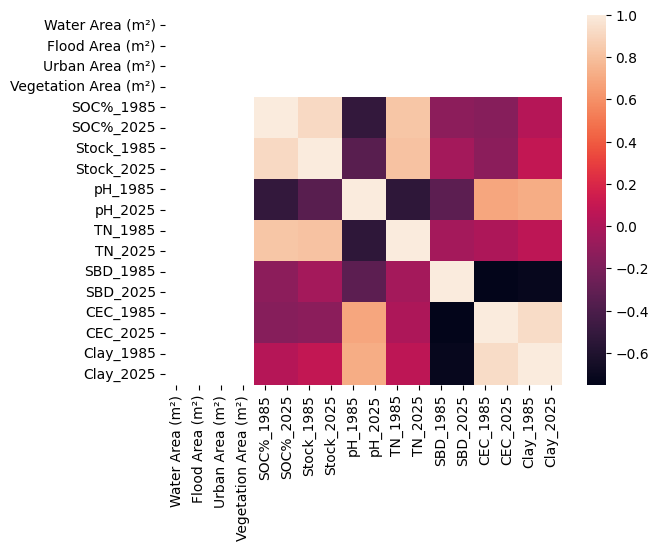

In [42]:
import seaborn as sns

sns.heatmap(correlation)

In [44]:
final_df.describe()

,Water Area Change (m²),Flooded Area Change (m²),Flood Area Change (m²),Urban Area Change (m²),Vegetation Area Change (m²),SOC%_1985,SOC%_2025,Stock_1985,Stock_2025,pH_1985,pH_2025,TN_1985,TN_2025,SBD_1985,SBD_2025,CEC_1985,CEC_2025,Clay_1985,Clay_2025
count,9.000000e+00,9.0,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,-1.801351e+09,0.0,-4.536200e+08,6.748694e+08,-2.438918e+08,1.274444,1.274444,162.058889,162.058889,4.744444,4.744444,0.122222,0.122222,1.654444,1.654444,211.753333,211.753333,48.021111,48.021111
std,1.284796e+05,0.0,2.360362e+04,3.979149e+04,1.073359e+04,0.556700,0.556700,80.970248,80.970248,0.685768,0.685768,0.014814,0.014814,0.247442,0.247442,52.802464,52.802464,14.839300,14.839300
min,-1.801442e+09,0.0,-4.536314e+08,6.748164e+08,-2.438963e+08,0.635000,0.635000,96.250000,96.250000,4.020000,4.020000,0.100000,0.100000,1.250000,1.250000,167.480000,167.480000,31.690000,31.690000
25%,-1.801432e+09,0.0,-4.536314e+08,6.748391e+08,-2.438959e+08,1.035000,1.035000,109.140000,109.140000,4.190000,4.190000,0.110000,0.110000,1.560000,1.560000,180.390000,180.390000,35.960000,35.960000
50%,-1.801432e+09,0.0,-4.536314e+08,6.748769e+08,-2.438959e+08,1.140000,1.140000,148.710000,148.710000,4.340000,4.340000,0.120000,0.120000,1.660000,1.660000,198.750000,198.750000,48.880000,48.880000
75%,-1.801236e+09,0.0,-4.536242e+08,6.749048e+08,-2.438949e+08,1.325000,1.325000,151.460000,151.460000,5.250000,5.250000,0.130000,0.130000,1.840000,1.840000,206.900000,206.900000,55.440000,55.440000
max,-1.801093e+09,0.0,-4.535611e+08,6.749236e+08,-2.438633e+08,2.630000,2.630000,351.120000,351.120000,5.860000,5.860000,0.150000,0.150000,2.050000,2.050000,325.000000,325.000000,72.200000,72.200000


In [47]:
final_df.columns

Index(['Location', 'Water Area Change (m²)', 'Flooded Area Change (m²)',
       'Flood Area Change (m²)', 'Urban Area Change (m²)',
       'Vegetation Area Change (m²)', 'SOC%_1985', 'SOC%_2025', 'Stock_1985',
       'Stock_2025', 'pH_1985', 'pH_2025', 'TN_1985', 'TN_2025', 'SBD_1985',
       'SBD_2025', 'CEC_1985', 'CEC_2025', 'Clay_1985', 'Clay_2025'],
      dtype='object')

In [49]:
cols = ['Water Area Change (m²)',
       'Flood Area Change (m²)', 'Urban Area Change (m²)',
       'Vegetation Area Change (m²)', 'SOC%_1985', 'SOC%_2025', 'Stock_1985',
       'Stock_2025', 'pH_1985', 'pH_2025', 'TN_1985', 'TN_2025', 'SBD_1985',
       'SBD_2025', 'CEC_1985', 'CEC_2025', 'Clay_1985', 'Clay_2025']

fd = final_df[cols]
fd

,Water Area Change (m²),Flood Area Change (m²),Urban Area Change (m²),Vegetation Area Change (m²),SOC%_1985,SOC%_2025,Stock_1985,Stock_2025,pH_1985,pH_2025,TN_1985,TN_2025,SBD_1985,SBD_2025,CEC_1985,CEC_2025,Clay_1985,Clay_2025
0,-1.801432e+09,-453631400.0,674840200.0,-243894900.0,2.630,2.630,351.12,351.12,4.10,4.10,0.15,0.15,1.56,1.56,198.75,198.75,55.44,55.44
1,-1.801236e+09,-453561100.0,674877600.0,-243896300.0,0.960,0.960,148.71,148.71,5.39,5.39,0.12,0.12,2.05,2.05,206.90,206.90,49.63,49.63
2,-1.801432e+09,-453631400.0,674916100.0,-243895900.0,1.100,1.100,149.65,149.65,5.86,5.86,0.11,0.11,1.37,1.37,271.50,271.50,67.56,67.56
3,-1.801432e+09,-453631400.0,674816400.0,-243893000.0,1.325,1.325,109.14,109.14,4.34,4.34,0.11,0.11,1.66,1.66,167.48,167.48,33.56,33.56
4,-1.801432e+09,-453624200.0,674876900.0,-243895900.0,1.220,1.220,151.46,151.46,4.02,4.02,0.13,0.13,1.69,1.69,180.39,180.39,35.96,35.96
5,-1.801418e+09,-453631400.0,674829500.0,-243863300.0,0.635,0.635,98.34,98.34,5.25,5.25,0.10,0.10,1.61,1.61,203.98,203.98,48.88,48.88
6,-1.801236e+09,-453631400.0,674904800.0,-243895900.0,1.035,1.035,96.25,96.25,4.19,4.19,0.12,0.12,1.86,1.86,184.29,184.29,37.27,37.27
7,-1.801442e+09,-453631400.0,674839100.0,-243895100.0,1.425,1.425,225.03,225.03,4.31,4.31,0.13,0.13,1.84,1.84,167.49,167.49,31.69,31.69
8,-1.801093e+09,-453606200.0,674923600.0,-243895900.0,1.140,1.140,128.83,128.83,5.24,5.24,0.13,0.13,1.25,1.25,325.00,325.00,72.20,72.20


In [50]:
fd.corr()

,Water Area Change (m²),Flood Area Change (m²),Urban Area Change (m²),Vegetation Area Change (m²),SOC%_1985,SOC%_2025,Stock_1985,Stock_2025,pH_1985,pH_2025,TN_1985,TN_2025,SBD_1985,SBD_2025,CEC_1985,CEC_2025,Clay_1985,Clay_2025
Water Area Change (m²),1.000000,0.573615,0.652505,-0.237553,-0.288625,-0.288625,-0.341031,-0.341031,0.280374,0.280374,0.089248,0.089248,-0.086337,-0.086337,0.597194,0.597194,0.431829,0.431829
Flood Area Change (m²),0.573615,1.000000,0.266292,-0.221624,-0.246244,-0.246244,-0.121136,-0.121136,0.406621,0.406621,0.034240,0.034240,0.382489,0.382489,0.229355,0.229355,0.226821,0.226821
Urban Area Change (m²),0.652505,0.266292,1.000000,-0.441788,-0.272020,-0.272020,-0.270824,-0.270824,0.423422,0.423422,0.063594,0.063594,-0.327582,-0.327582,0.717392,0.717392,0.587549,0.587549
Vegetation Area Change (m²),-0.237553,-0.221624,-0.441788,1.000000,-0.399503,-0.399503,-0.285629,-0.285629,0.238732,0.238732,-0.569955,-0.569955,-0.072338,-0.072338,-0.094457,-0.094457,-0.015874,-0.015874
SOC%_1985,-0.288625,-0.246244,-0.272020,-0.399503,1.000000,1.000000,0.917883,0.917883,-0.515605,-0.515605,0.823218,0.823218,-0.129697,-0.129697,-0.159026,-0.159026,0.036066,0.036066
SOC%_2025,-0.288625,-0.246244,-0.272020,-0.399503,1.000000,1.000000,0.917883,0.917883,-0.515605,-0.515605,0.823218,0.823218,-0.129697,-0.129697,-0.159026,-0.159026,0.036066,0.036066
Stock_1985,-0.341031,-0.121136,-0.270824,-0.285629,0.917883,0.917883,1.000000,1.000000,-0.348410,-0.348410,0.811916,0.811916,-0.036490,-0.036490,-0.137631,-0.137631,0.088715,0.088715
Stock_2025,-0.341031,-0.121136,-0.270824,-0.285629,0.917883,0.917883,1.000000,1.000000,-0.348410,-0.348410,0.811916,0.811916,-0.036490,-0.036490,-0.137631,-0.137631,0.088715,0.088715
pH_1985,0.280374,0.406621,0.423422,0.238732,-0.515605,-0.515605,-0.348410,-0.348410,1.000000,1.000000,-0.531426,-0.531426,-0.328970,-0.328970,0.687553,0.687553,0.713822,0.713822
pH_2025,0.280374,0.406621,0.423422,0.238732,-0.515605,-0.515605,-0.348410,-0.348410,1.000000,1.000000,-0.531426,-0.531426,-0.328970,-0.328970,0.687553,0.687553,0.713822,0.713822


<Axes: >

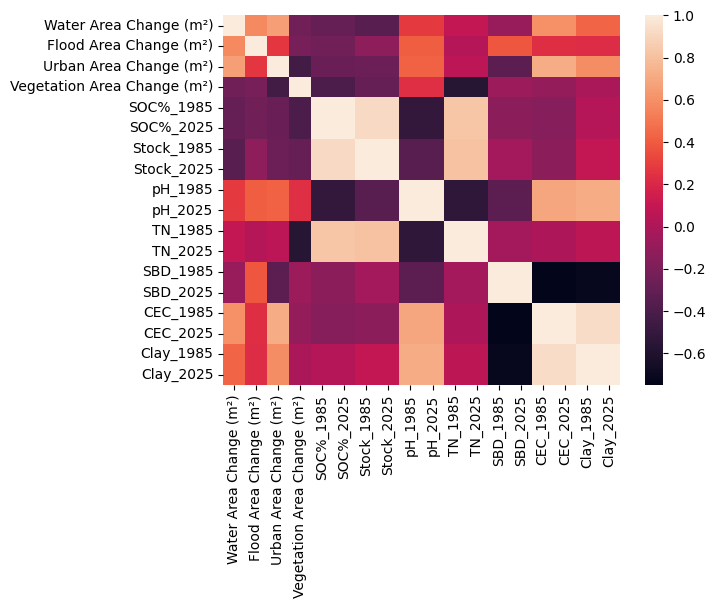

In [51]:
sns.heatmap(fd.corr())